# Comparison: GapNet vs. other models

In this tutorial we follow the same steps explaned in the gapnet tutorial notebook and compare them to other standard neural networks trained either only on the subjects without missing values or on imputed dataset.

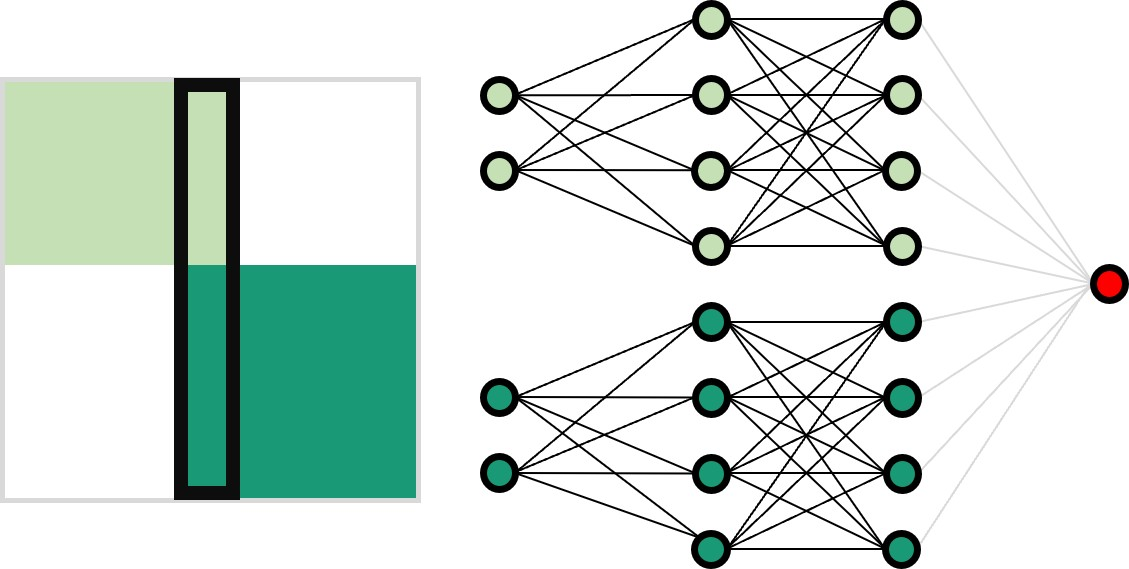

In [1]:
# Architecture of the GapNet
from IPython.display import Image
Image("assets/Gapnet.jpg", width = 500)

The figure shows a schematic representation of the dataset (on the left) and the GapNet approach (on the right) where the training takes place in two stages, where the connectors in black are trained in the first stage and the connectors in gray are trained in the second one.

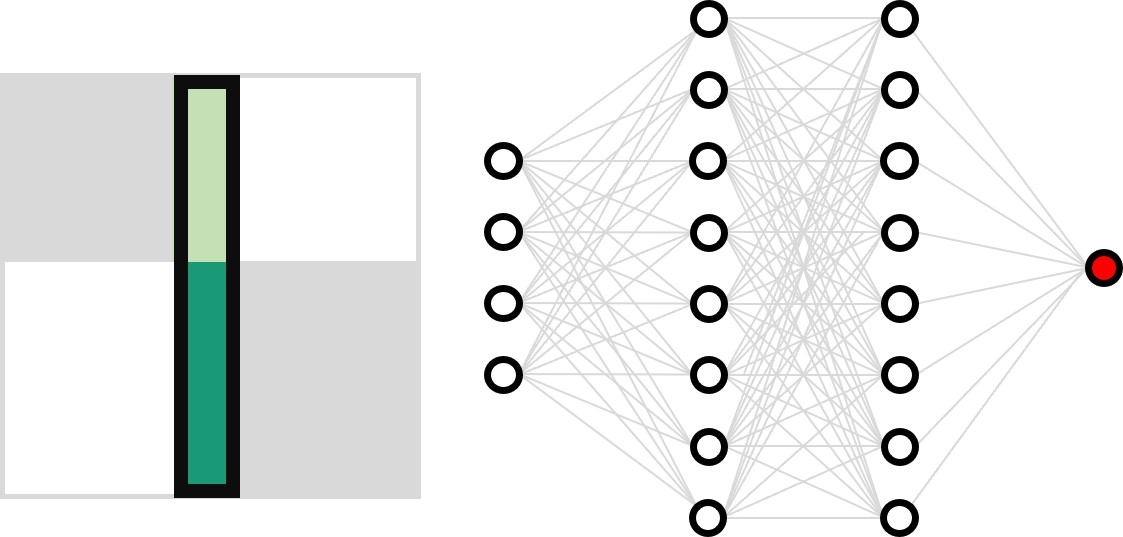

In [2]:
# Architecture of the Standard model
from IPython.display import Image
Image("assets/Vanilla.jpg", width = 500)

The figure shows a schematic representation of the dataset (on the left) and the Vanilla neural network (on the right). Only the complete cases are used for Vanilla model. 

## Initialization

First thing first, we load the main gapnet functions as well as other useful package

In [3]:
from src import gapnet as gapnet
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import isnan, load
import numpy as np

## Load the dataset

We provide an example dataset adapted from the the simulated dataset [Madelon](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=madelon). We provide two files: one including the inputs "X.npy" and one with the targets "Y.npy".

The dataset consists of 1000 subjects of which only 100 have all 40 features.

In [4]:
X = load('data/X.npy') 
Y = load('data/Y.npy')

print("Number of features {}".format(X.shape[1]))
print("Number of subjects {}".format(X.shape[0]))

Number of features 40
Number of subjects 1000


## Generate models

Now, it is time to build both gapnet and other models for complete cases (vanilla) and imputed dataset.

It requires first of all to define an object that will include all gapnet elements, and is defined as <br>
gapnet_model = gapnet.generate_gapnet_model() <br>
vanilla_model = gapnet.generate_standard_model() <br>
imputation_model = gapnet.generate_standard_model() <br>

Afterwards, the build_model function is required to introduce the gapnet neural network architecture. <br>
gapnet_model.build_model() <br>
vanilla_model.build_model() <br>
imputation_model.build_model() <br>

Now, the modes are ready to be trained. Use the following functions to take as inputs the training and testing sets. <br>
gapnet_model.train_first_stage(X_train, Y_train, X_test, Y_test) <br>
gapnet_model.train_second_stage(X_train, Y_train, X_test, Y_test) <br> 
vanilla_model.train_single_stage(X_overlap, Y_overlap, X_test, Y_test)<br>
imputation_model.train_single_stage(X_overlap, Y_overlap, X_test, Y_test) <br>


In [5]:
vanilla_model = gapnet.generate_standard_model(n_feature = X.shape[1])
vanilla_model.build_model(show_summary=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 9,841
Trainable params: 9,841
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
imputation_mean_model = gapnet.generate_standard_model(name = 'mean', n_feature = X.shape[1])
imputation_mean_model.build_model(show_summary=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3280      
                                                                 
 dense_4 (Dense)             (None, 80)                6480      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 81        
                                                                 
Total params: 9,841
Trainable params: 9,841
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
imputation_median_model = gapnet.generate_standard_model(name = 'median', n_feature = X.shape[1])
imputation_median_model.build_model(show_summary=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                3280      
                                                                 
 dense_7 (Dense)             (None, 80)                6480      
                                                                 
 dropout_2 (Dropout)         (None, 80)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 81        
                                                                 
Total params: 9,841
Trainable params: 9,841
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
imputation_freq_model = gapnet.generate_standard_model(name = 'frequent', n_feature = X.shape[1])
imputation_freq_model.build_model(show_summary=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                3280      
                                                                 
 dense_10 (Dense)            (None, 80)                6480      
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 81        
                                                                 
Total params: 9,841
Trainable params: 9,841
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
imputation_knn_model = gapnet.generate_standard_model(name = 'knn', n_feature = X.shape[1])
imputation_knn_model.build_model(show_summary=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 80)                3280      
                                                                 
 dense_13 (Dense)            (None, 80)                6480      
                                                                 
 dropout_4 (Dropout)         (None, 80)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 81        
                                                                 
Total params: 9,841
Trainable params: 9,841
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
imputation_bayesian_model = gapnet.generate_standard_model(name = 'bayesian', n_feature = X.shape[1])
imputation_bayesian_model.build_model(show_summary=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 80)                3280      
                                                                 
 dense_16 (Dense)            (None, 80)                6480      
                                                                 
 dropout_5 (Dropout)         (None, 80)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 81        
                                                                 
Total params: 9,841
Trainable params: 9,841
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
gapnet_model = gapnet.generate_gapnet_model(cluster_sizes = [25,15], n_feature = X.shape[1])
gapnet_model.build_model(show_summary=True)

Generating the 1 neural network model ... 
Generating the 2 neural network model ... 
Generating the final gapnet model ... 
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 15)]         0           []                               
                                                                                                  
 dense_24 (Dense)               (None, 50)           1300        ['input_9[0][0]']                
                                                                                                  
 dense_25 (Dense)               (None, 30)           480         ['i

## Train the models

In [12]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_overlap, Y_overlap, X_incomplete, Y_incomplete = gapnet.separate_missing_data(X, Y)
fold = 1

for train_index, test_index in skf.split(X_overlap, Y_overlap):
    X_train, X_test = X_overlap[train_index], X_overlap[test_index]
    Y_train, Y_test = Y_overlap[train_index], Y_overlap[test_index]
    
    # train vanilla
    X_train_vanilla, X_test_vanilla = gapnet.preprocess_standardization(X_train, X_test)
    vanilla_model.train_single_stage(X_train_vanilla, Y_train, X_test_vanilla, Y_test)
    
    # train imputation_model with mean-imputing dataset
    X_train_with_imputation, Y_train_with_imputation, X_test_with_imputation = gapnet.preprocess_standardization_with_imputed_data('mean', X_train, Y_train, X_test, X_incomplete, Y_incomplete)
    imputation_mean_model.train_single_stage( X_train_with_imputation, Y_train_with_imputation, X_test_with_imputation, Y_test)
    
    # train imputation_model with median-imputing dataset
    X_train_with_imputation, Y_train_with_imputation, X_test_with_imputation = gapnet.preprocess_standardization_with_imputed_data('median', X_train, Y_train, X_test, X_incomplete, Y_incomplete)
    imputation_median_model.train_single_stage( X_train_with_imputation, Y_train_with_imputation, X_test_with_imputation, Y_test)
    
    # train imputation_model with frequent-imputing dataset
    X_train_with_imputation, Y_train_with_imputation, X_test_with_imputation = gapnet.preprocess_standardization_with_imputed_data('frequent', X_train, Y_train, X_test, X_incomplete, Y_incomplete)
    imputation_freq_model.train_single_stage( X_train_with_imputation, Y_train_with_imputation, X_test_with_imputation, Y_test)
    
    # train imputation_model with knn-imputing dataset
    X_train_with_imputation, Y_train_with_imputation, X_test_with_imputation = gapnet.preprocess_standardization_with_imputed_data('knn', X_train, Y_train, X_test, X_incomplete, Y_incomplete)
    imputation_knn_model.train_single_stage( X_train_with_imputation, Y_train_with_imputation, X_test_with_imputation, Y_test)
    
    # train imputation_model with bayesian-imputing dataset
    X_train_with_imputation, Y_train_with_imputation, X_test_with_imputation = gapnet.preprocess_standardization_with_imputed_data('bayesian', X_train, Y_train, X_test, X_incomplete, Y_incomplete)
    imputation_bayesian_model.train_single_stage( X_train_with_imputation, Y_train_with_imputation, X_test_with_imputation, Y_test)
    
    # train gapnet
    X_train_gapnet, X_test_gapnet, X_train_overall, Y_train_overall = gapnet.preprocess_standardization_with_missing_data(X_train, Y_train, X_test, X_incomplete, Y_incomplete)
    gapnet_model.train_first_stage(X_train_overall, Y_train_overall, X_test_gapnet, Y_test)
    gapnet_model.train_second_stage(X_train_gapnet, Y_train, X_test_gapnet, Y_test)
    
    print(fold, ' fold(s) finished')
    fold+=1

Training process of vanilla is done.
Training process of mean is done.
Training process of median is done.
Training process of frequent is done.
Training process of knn is done.
Training process of bayesian is done.
Training process of first stage of GapNet is done.
Training process of second stage of GapNet is done.
1  fold(s) finished
Training process of vanilla is done.
Training process of mean is done.
Training process of median is done.
Training process of frequent is done.
Training process of knn is done.
Training process of bayesian is done.
Training process of first stage of GapNet is done.
Training process of second stage of GapNet is done.
2  fold(s) finished
Training process of vanilla is done.
Training process of mean is done.
Training process of median is done.
Training process of frequent is done.
Training process of knn is done.
Training process of bayesian is done.
Training process of first stage of GapNet is done.
Training process of second stage of GapNet is done.
3  

In [13]:
gapnet.present_results(vanilla_model)

Results :
train_accuracy 1.000+/-0.000 : [1. 1. 1. 1. 1.]
test_accuracy 0.560+/-0.058 : [0.55 0.65 0.5  0.5  0.6 ]
test_auc 0.606+/-0.096 : [0.576 0.68  0.435 0.64  0.7  ]
test_sens 0.550+/-0.067 : [0.5   0.667 0.5   0.5   0.583]
test_spec 0.572+/-0.060 : [0.6   0.636 0.5   0.5   0.625]
test_prec 0.531+/-0.117 : [0.556 0.6   0.4   0.4   0.7  ]


In [14]:
gapnet.present_results(gapnet_model)

Results :
train_accuracy 0.998+/-0.005 : [0.988 1.    1.    1.    1.   ]
test_accuracy 0.910+/-0.107 : [0.7  0.95 1.   0.95 0.95]
test_auc 0.968+/-0.065 : [0.838 1.    1.    1.    1.   ]
test_sens 0.891+/-0.134 : [0.636 0.909 1.    1.    0.909]
test_spec 0.937+/-0.087 : [0.778 1.    1.    0.909 1.   ]
test_prec 0.936+/-0.088 : [0.778 1.    1.    0.9   1.   ]


In [15]:
gapnet.present_results(imputation_mean_model)

Results :
train_accuracy 0.993+/-0.008 : [0.977 0.997 0.996 1.    0.996]
test_accuracy 0.650+/-0.063 : [0.6  0.7  0.75 0.6  0.6 ]
test_auc 0.716+/-0.079 : [0.636 0.77  0.84  0.635 0.7  ]
test_sens 0.647+/-0.074 : [0.556 0.75  0.692 0.667 0.571]
test_spec 0.680+/-0.095 : [0.636 0.667 0.857 0.571 0.667]
test_prec 0.651+/-0.178 : [0.556 0.6   0.9   0.4   0.8  ]


In [16]:
gapnet.present_results(imputation_median_model)

Results :
train_accuracy 0.996+/-0.003 : [0.998 1.    0.995 0.99  0.996]
test_accuracy 0.690+/-0.049 : [0.65 0.75 0.65 0.75 0.65]
test_auc 0.746+/-0.049 : [0.667 0.805 0.73  0.79  0.74 ]
test_sens 0.689+/-0.094 : [0.625 0.727 0.636 0.857 0.6  ]
test_spec 0.721+/-0.057 : [0.667 0.778 0.667 0.692 0.8  ]
test_prec 0.711+/-0.127 : [0.556 0.8   0.7   0.6   0.9  ]


In [17]:
gapnet.present_results(imputation_freq_model)

Results :
train_accuracy 0.953+/-0.005 : [0.945 0.959 0.952 0.951 0.956]
test_accuracy 0.710+/-0.092 : [0.6  0.75 0.6  0.8  0.8 ]
test_auc 0.747+/-0.059 : [0.687 0.75  0.69  0.85  0.76 ]
test_sens 0.693+/-0.103 : [0.556 0.778 0.583 0.8   0.75 ]
test_spec 0.733+/-0.096 : [0.636 0.727 0.625 0.8   0.875]
test_prec 0.731+/-0.115 : [0.556 0.7   0.7   0.8   0.9  ]


In [18]:
gapnet.present_results(imputation_knn_model)

Results :
train_accuracy 0.996+/-0.003 : [0.999 0.999 0.993 0.996 0.991]
test_accuracy 0.580+/-0.108 : [0.45 0.55 0.65 0.5  0.75]
test_auc 0.671+/-0.100 : [0.571 0.74  0.69  0.545 0.81 ]
test_sens 0.558+/-0.091 : [0.429 0.556 0.615 0.5   0.692]
test_spec 0.623+/-0.141 : [0.5   0.545 0.714 0.5   0.857]
test_prec 0.673+/-0.160 : [0.667 0.5   0.8   0.5   0.9  ]


In [19]:
gapnet.present_results(imputation_bayesian_model)

Results :
train_accuracy 0.996+/-0.002 : [0.995 1.    0.994 0.995 0.994]
test_accuracy 0.750+/-0.084 : [0.85 0.7  0.7  0.65 0.85]
test_auc 0.803+/-0.072 : [0.889 0.695 0.85  0.745 0.835]
test_sens 0.770+/-0.120 : [1.    0.7   0.667 0.714 0.769]
test_spec 0.770+/-0.128 : [0.786 0.7   0.75  0.615 1.   ]
test_prec 0.733+/-0.165 : [0.667 0.7   0.8   0.5   1.   ]


## Compare the performances

After training the gapnet, it is possible to show the results by plotting the ROC curve, the confusion matrix, the loss, precision and recall functions along the training.

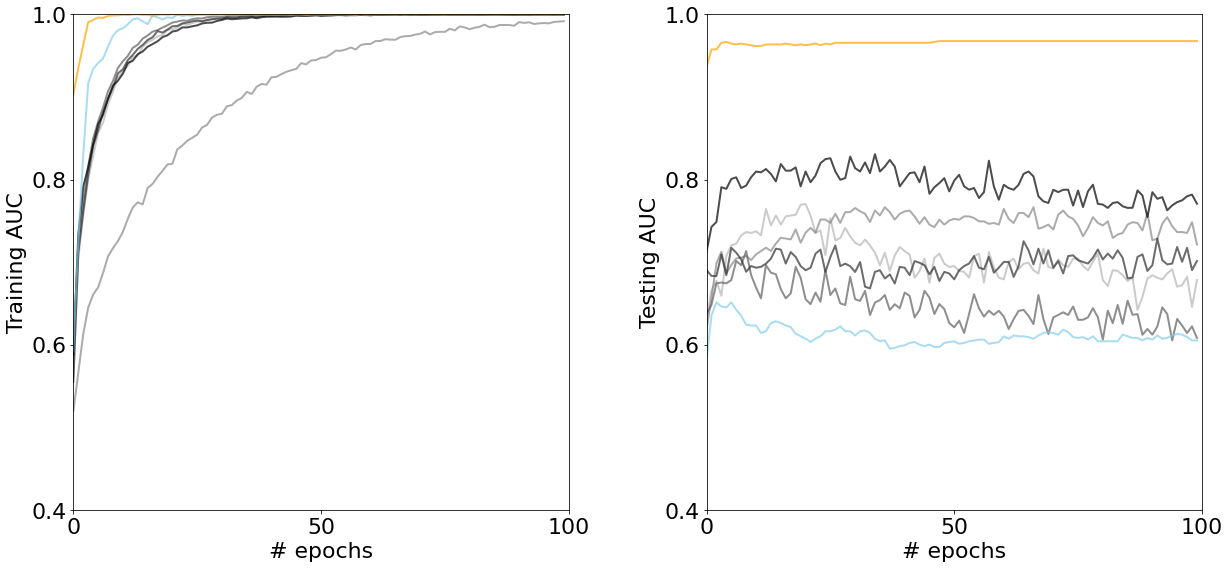

In [20]:
fig, axes = plt.subplots(1,2,figsize=(18, 8))
cmap = plt.cm.get_cmap('Greys')
linsp = np.linspace(0.4,1,5)
gapnet.plot_auc_metrics('Mean', imputation_mean_model.histories, axes = axes[0], training = True, color=cmap(linsp[0]), alpha=0.15)
gapnet.plot_auc_metrics('Most frequent', imputation_freq_model.histories, axes = axes[0], training = True, color=cmap(linsp[1]), alpha=0.15)
gapnet.plot_auc_metrics('KNN', imputation_knn_model.histories, axes = axes[0], training = True, color=cmap(linsp[2]), alpha=0.15)
gapnet.plot_auc_metrics('Median', imputation_median_model.histories, axes = axes[0], training = True, color=cmap(linsp[3]), alpha=0.15)
gapnet.plot_auc_metrics('Bayesian', imputation_bayesian_model.histories, axes = axes[0], training = True, color=cmap(linsp[4]), alpha=0.15)
gapnet.plot_auc_metrics('Vanilla', vanilla_model.histories, axes = axes[0], training = True, color='skyblue', alpha=0.15)
gapnet.plot_auc_metrics('GapNet', gapnet_model.histories, axes = axes[0], training = True, color='orange', alpha=0.15)

gapnet.plot_auc_metrics('Mean', imputation_mean_model.histories, axes = axes[1], training = False, color=cmap(linsp[0]), alpha=0.15)
gapnet.plot_auc_metrics('Most frequent', imputation_freq_model.histories, axes = axes[1], training = False, color=cmap(linsp[1]), alpha=0.15)
gapnet.plot_auc_metrics('KNN', imputation_knn_model.histories, axes = axes[1], training = False, color=cmap(linsp[2]), alpha=0.15)
gapnet.plot_auc_metrics('Median', imputation_median_model.histories, axes = axes[1], training = False, color=cmap(linsp[3]), alpha=0.15)
gapnet.plot_auc_metrics('Bayesian', imputation_bayesian_model.histories, axes = axes[1], training = False, color=cmap(linsp[4]), alpha=0.15)
gapnet.plot_auc_metrics('Vanilla', vanilla_model.histories, axes = axes[1], training = False, color='skyblue', alpha=0.15)
gapnet.plot_auc_metrics('GapNet', gapnet_model.histories, axes = axes[1], training = False, color='orange', alpha=0.15)
plt.tight_layout()
plt.subplots_adjust(left=None, right=None, bottom=None, top=None, wspace=0.1, hspace=0.1)

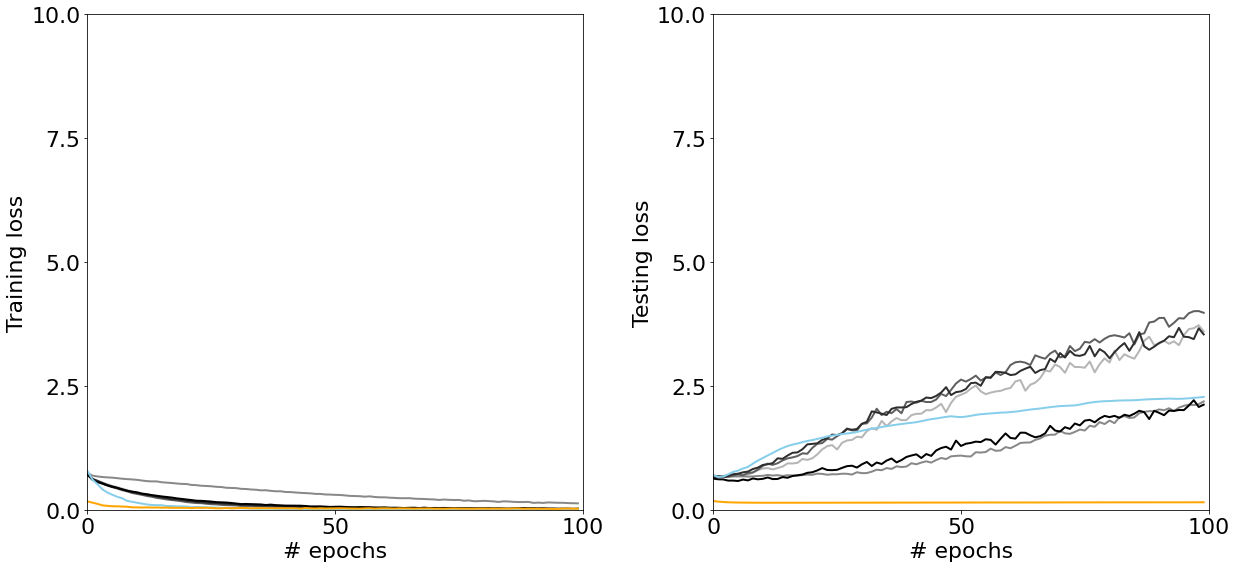

In [21]:
fig, axes = plt.subplots(1,2,figsize=(18, 8))
cmap = plt.cm.get_cmap('Greys')
linsp = np.linspace(0.4,1,5)
gapnet.plot_loss_metrics('Mean', imputation_mean_model.histories, axes = axes[0], training = True, color=cmap(linsp[0]), alpha=0.15)
gapnet.plot_loss_metrics('Most frequent', imputation_freq_model.histories, axes = axes[0], training = True, color=cmap(linsp[1]), alpha=0.15)
gapnet.plot_loss_metrics('KNN', imputation_knn_model.histories, axes = axes[0], training = True, color=cmap(linsp[2]), alpha=0.15)
gapnet.plot_loss_metrics('Median', imputation_median_model.histories, axes = axes[0], training = True, color=cmap(linsp[3]), alpha=0.15)
gapnet.plot_loss_metrics('Bayesian', imputation_bayesian_model.histories, axes = axes[0], training = True, color=cmap(linsp[4]), alpha=0.15)
gapnet.plot_loss_metrics('Vanilla', vanilla_model.histories, axes = axes[0], training = True, color='skyblue', alpha=0.15)
gapnet.plot_loss_metrics('GapNet', gapnet_model.histories, axes = axes[0], training = True, color='orange', alpha=0.15)

gapnet.plot_loss_metrics('Mean', imputation_mean_model.histories, axes = axes[1], training = False, color=cmap(linsp[0]), alpha=0.15)
gapnet.plot_loss_metrics('Most frequent', imputation_freq_model.histories, axes = axes[1], training = False, color=cmap(linsp[1]), alpha=0.15)
gapnet.plot_loss_metrics('KNN', imputation_knn_model.histories, axes = axes[1], training = False, color=cmap(linsp[2]), alpha=0.15)
gapnet.plot_loss_metrics('Median', imputation_median_model.histories, axes = axes[1], training = False, color=cmap(linsp[3]), alpha=0.15)
gapnet.plot_loss_metrics('Bayesian', imputation_bayesian_model.histories, axes = axes[1], training = False, color=cmap(linsp[4]), alpha=0.15)
gapnet.plot_loss_metrics('Vanilla', vanilla_model.histories, axes = axes[1], training = False, color='skyblue', alpha=0.15)
gapnet.plot_loss_metrics('GapNet', gapnet_model.histories, axes = axes[1], training = False, color='orange', alpha=0.15)
plt.tight_layout()
plt.subplots_adjust(left=None, right=None, bottom=None, top=None, wspace=0.1, hspace=0.1)

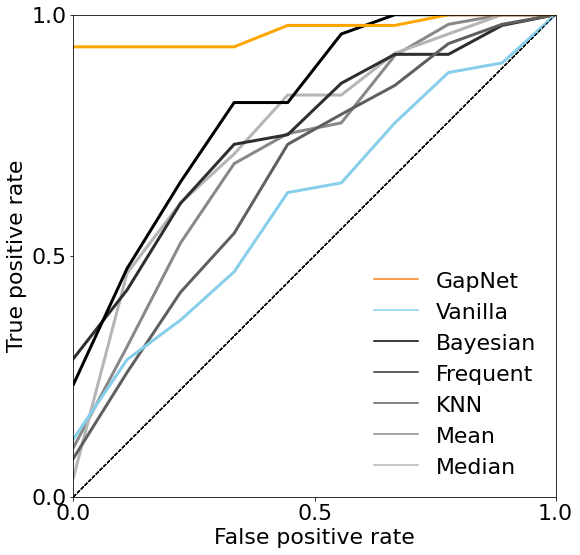

In [22]:
fig, axe = plt.subplots(1,1,figsize=(8, 8))
cmap = plt.cm.get_cmap('Greys')
linsp = np.linspace(0.4,1,5)
axe.plot(0,0.7, color= "C1", label = "GapNet")
axe.plot(0,0.7, color= "skyblue", label = "Vanilla")
axe.plot(0,0.7, color= cmap(linsp[4]), label = "Bayesian")
axe.plot(0,0.7, color= cmap(linsp[3]), label = "Frequent")
axe.plot(0,0.7, color= cmap(linsp[2]), label = "KNN")
axe.plot(0,0.7, color= cmap(linsp[1]), label = "Mean")
axe.plot(0,0.7, color= cmap(linsp[0]), label = "Median")
gapnet.plot_roc("Mean", imputation_mean_model.val_y_labels, imputation_mean_model.val_y_preds, axe=axe, linestyle='solid', color=cmap(linsp[1]), alpha=0.15, shaded=False)
gapnet.plot_roc("Median", imputation_median_model.val_y_labels, imputation_median_model.val_y_preds, axe=axe, linestyle='solid', color=cmap(linsp[0]), alpha=0.15)
gapnet.plot_roc("Frequent", imputation_freq_model.val_y_labels, imputation_freq_model.val_y_preds, axe=axe, linestyle='solid', color=cmap(linsp[3]), alpha=0.15)
gapnet.plot_roc("KNN", imputation_knn_model.val_y_labels, imputation_knn_model.val_y_preds, axe=axe, linestyle='solid', color=cmap(linsp[2]), alpha=0.15)
gapnet.plot_roc("Bayesian", imputation_bayesian_model.val_y_labels,imputation_bayesian_model.val_y_preds, axe=axe, linestyle='solid', color=cmap(linsp[4]), alpha=0.15)
gapnet.plot_roc("Vanilla", vanilla_model.val_y_labels, vanilla_model.val_y_preds, axe=axe, linestyle='solid',  color='skyblue', alpha=0.15)
gapnet.plot_roc("GapNet", gapnet_model.val_y_labels, gapnet_model.val_y_preds, axe=axe, linestyle='solid', color='orange', x_label=True, alpha=0.15)
axe.legend( frameon=False, fontsize = 22, title_fontsize = 22)
plt.tight_layout()
plt.subplots_adjust(left=None, right=None, bottom=None, top=None, wspace=0.1, hspace=0.1)
plt.savefig("ROC_curve.svg")

In [23]:
print(gapnet.delong_test(gapnet_model.val_y_preds, vanilla_model.val_y_preds, gapnet_model.val_y_labels))

(6.877506492032422, 6.090924814521592e-12)
